In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def invert_grayscale(images):
    """ Makes black white, and white black """
    return 255 - images

In [19]:
def vector_to_matrix(img):
    
    """Reshapes normal image to (batch,28*28) to matrix (batch,28,28)"""
    return np.reshape(img, (-1, 28, 28))

In [20]:
def get_image(to_visualise, do_invert=True):
    to_visualise = vector_to_matrix(to_visualise)
    if do_invert:
        to_visualise = invert_grayscale(to_visualise)
    return create_image(to_visualise)

In [21]:
def create_image(images):
    import numpy as np
    """Returns a image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))

    finimage = np.ones((img_h * n_plots, img_w * n_plots))

    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                finimage[i * img_h:(i + 1) * img_h,
                j * img_w:(j + 1) * img_w] = this_img

    return finimage

In [22]:
def load_obj(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [23]:
x_train, y_train = load_obj('Datasets', kind='train')

x_test,y_test=load_obj('Datasets', kind='t10k')

x_train shape: (60000, 784) y_train shape: (60000,)
60000 train set
10000 test set
y = 6


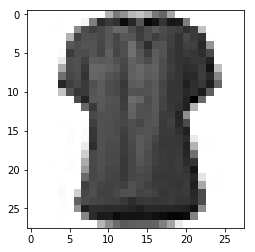

In [24]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59999
img_index = 55
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) )
# # Show one of the images from the training dataset
plt.imshow(get_image(x_train[img_index]),cmap='gray')

In [25]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [26]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [27]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [28]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', 
                                 input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, 
                               save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4389 - acc: 0.8442
Epoch 00001: val_loss improved from inf to 0.32063, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 98s 2ms/step - loss: 0.4389 - acc: 0.8441 - val_loss: 0.3206 - val_acc: 0.8814
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.2975 - acc: 0.8923
Epoch 00002: val_loss improved from 0.32063 to 0.27793, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 81s 1ms/step - loss: 0.2975 - acc: 0.8923 - val_loss: 0.2779 - val_acc: 0.9006
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.2579 - acc: 0.9051
Epoch 00003: val_loss improved from 0.27793 to 0.25371, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 96s 2ms/step - loss: 0.2580 - acc: 0.9050 - val_loss: 0.2537 - val_acc: 0.9112
Epoc

In [31]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [32]:
# Evaluate the model on test set
score = model.evaluate(x_train, y_train, verbose=0)

# Print test accuracy
print('\n', 'Train accuracy:', score[1])

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Train accuracy: 0.9550181818181818

 Test accuracy: 0.909


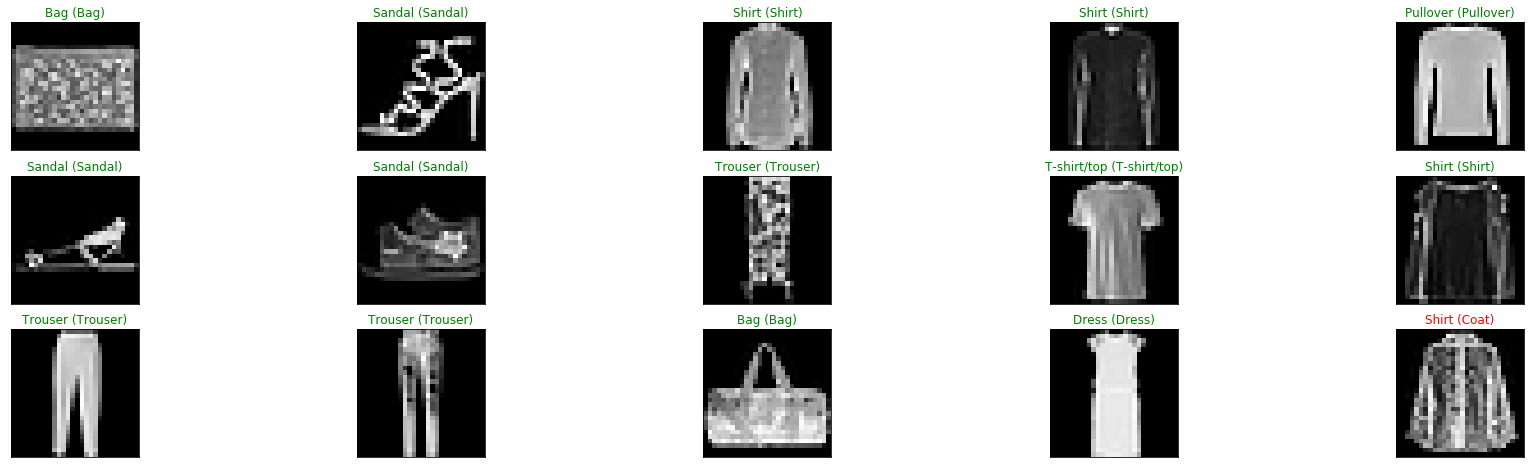

In [33]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(30, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]),cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Confusion matrix, without normalization
[[868   0  17   8   4   0  95   0   8   0]
 [  0 980   0  10   5   0   3   0   2   0]
 [ 16   0 873   5  44   0  61   0   1   0]
 [ 19   7  11 875  47   0  37   0   4   0]
 [  0   1  72  11 850   0  65   0   1   0]
 [  0   0   0   0   0 982   0  12   0   6]
 [104   1  64  16  58   0 748   0   9   0]
 [  0   0   0   0   0   7   0 963   0  30]
 [  2   1   3   3   2   4   2   2 981   0]
 [  0   0   0   0   0   4   1  25   0 970]]


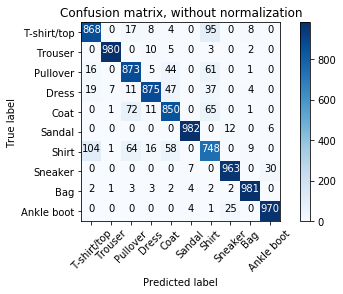

Normalized confusion matrix
[[0.87 0.   0.02 0.01 0.   0.   0.1  0.   0.01 0.  ]
 [0.   0.98 0.   0.01 0.01 0.   0.   0.   0.   0.  ]
 [0.02 0.   0.87 0.01 0.04 0.   0.06 0.   0.   0.  ]
 [0.02 0.01 0.01 0.88 0.05 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.07 0.01 0.85 0.   0.07 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.98 0.   0.01 0.   0.01]
 [0.1  0.   0.06 0.02 0.06 0.   0.75 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.96 0.   0.03]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.98 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.97]]


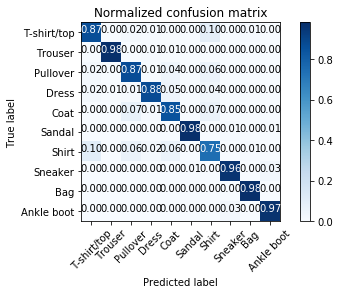

In [36]:
plt.show()
            
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))
np.set_printoptions(precision=2)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=fashion_mnist_labels,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=fashion_mnist_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()